In [1]:
import numpy as np
import pickle
from scipy.io import savemat, loadmat
from helpers import *

In [2]:
path = '/Users/bengieru/Desktop/DPPM/analysis/'
case = 'G_FSFR/'

window_size = 1000
standard_dev = 1.2
pad = True

In [3]:
with open(path + case + 'spikes_G_FSFR.pkl', 'rb') as handle:
    G_FSFR_spikes = pickle.load(handle)
with open(path + case + 'comm_size_G_FSFR.pkl', 'rb') as handle:
    G_FSFR_comm_size = pickle.load(handle)
    
num_neurons = sum(G_FSFR_comm_size)
layers = len(G_FSFR_comm_size)+2

binned_spikes_G_FSFR = bin_time_series(G_FSFR_spikes, window_size, gaussian = True, sigma = standard_dev)

adjacency_matrices = {}
for i in range(1,layers-1):
    adjacency_matrices['t%d'%i] = cross_correlation_matrix(binned_spikes_G_FSFR[i-1])[0]
if pad:
    adjacency_matrices['t%d'%0] = adjacency_matrices['t%d'%1]
    adjacency_matrices['t%d'%(layers-1)] = adjacency_matrices['t%d'%(layers-2)]

C:\Users\bengieru\Desktop\DPPM\analysis\G_FSFR\helpers.py:29: RuntimeWarning: invalid value encountered in sqrt
  x_cov_std = np.nanmax(np.sqrt(np.correlate(x - x_mean, x - x_mean, 'full')))
C:\Users\bengieru\Desktop\DPPM\analysis\G_FSFR\helpers.py:30: RuntimeWarning: invalid value encountered in sqrt
  y_cov_std = np.nanmax(np.sqrt(np.correlate(y - y_mean, y - y_mean, 'full')))


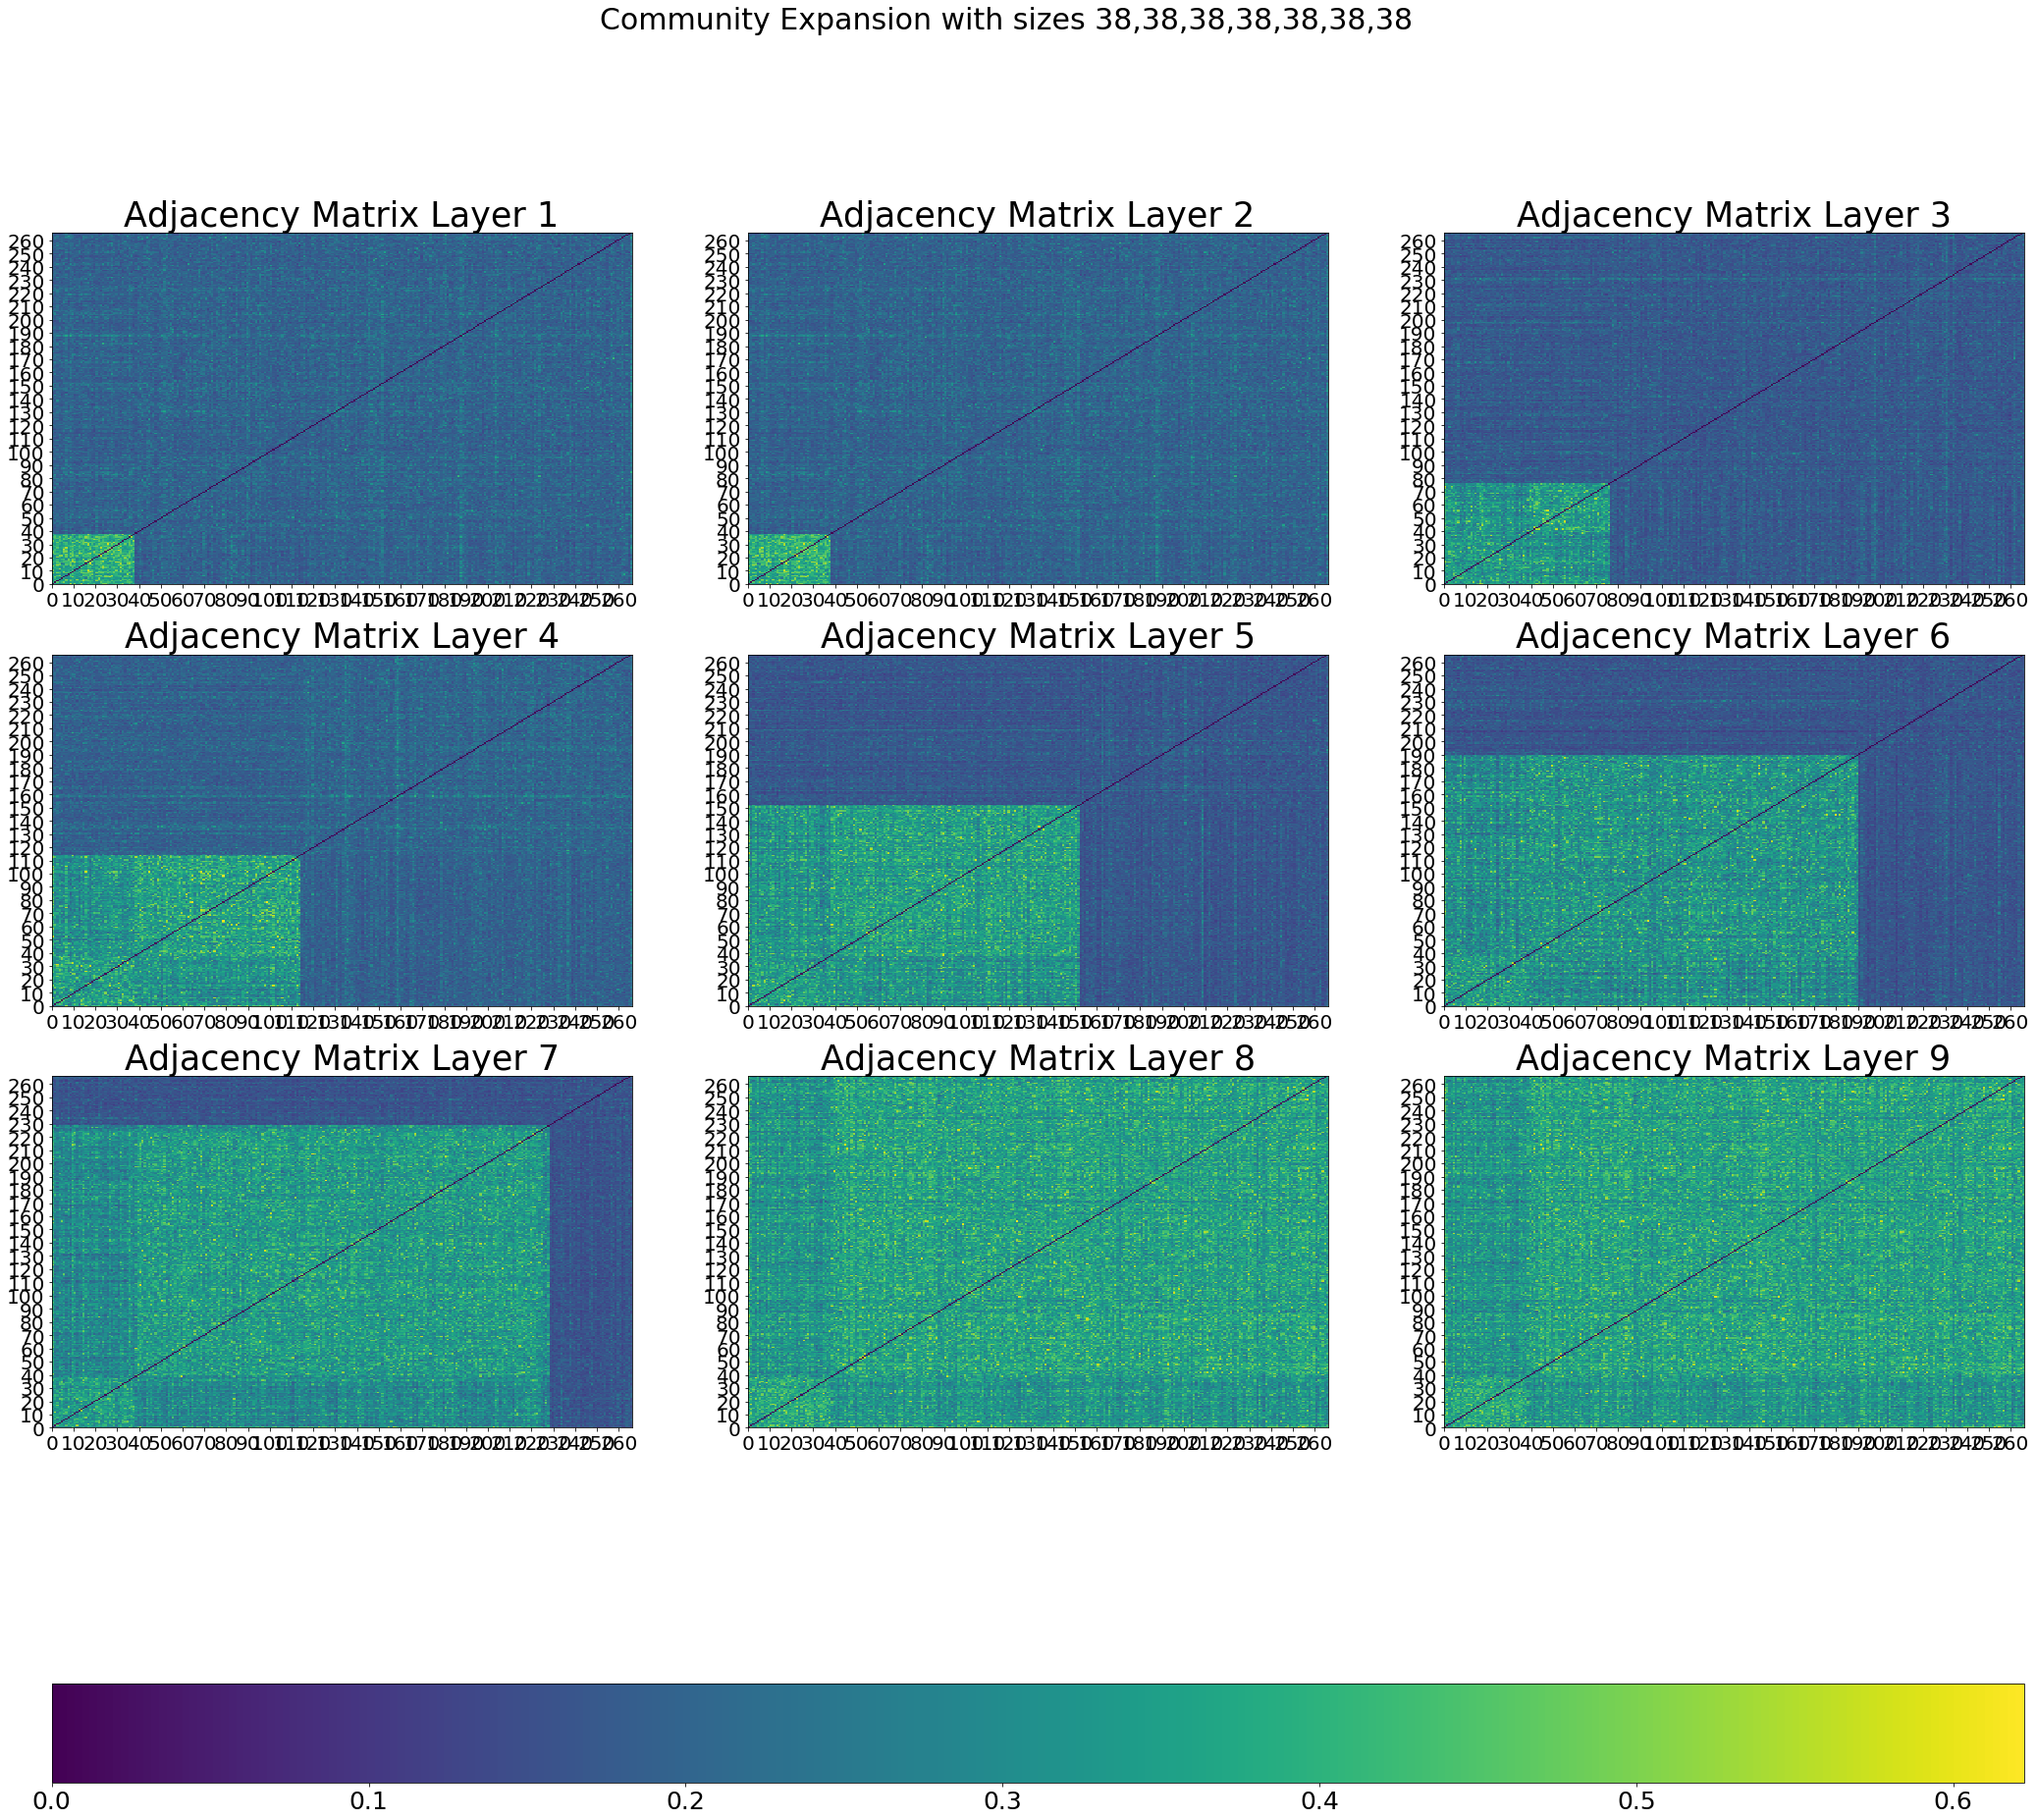

In [4]:
fig, ax = plt.subplots(3,3,figsize=(36,32))
for i in range(3):
    for j in range(3):
        k = ax[i][j].imshow(adjacency_matrices['t%d'%(i*3+j)], 
                            origin = 'lower', 
                            interpolation = 'nearest',
                            aspect = 'auto',
                            extent = [0,num_neurons,0,num_neurons])
        ax[i][j].set_title("Adjacency Matrix Layer %d"%(i*3+j+1), fontsize = 35)
        ax[i][j].set_xticks([k*10 for k in range(int(num_neurons/10)+1)])
        ax[i][j].set_yticks([k*10 for k in range(int(num_neurons/10)+1)])
        ax[i][j].tick_params(axis = 'both', labelsize = 20)
fig.suptitle('Community Expansion with sizes %d,%d,%d,%d,%d,%d,%d'%(G_FSFR_comm_size[0],G_FSFR_comm_size[1],G_FSFR_comm_size[2],G_FSFR_comm_size[3],G_FSFR_comm_size[4],G_FSFR_comm_size[5],G_FSFR_comm_size[6]), fontsize = 30)
cbar = fig.colorbar(k, ax = ax.flat, orientation = 'horizontal')
cbar.ax.tick_params(labelsize = 25)

In [5]:
thresholded_adjacencies = []
threshs = np.linspace(0.02,0.6,30)
for i,e in enumerate(threshs):
    for j in range(layers):
        thresholded_adjacencies.append(binarize(adjacency_matrices['t%d'%j],e))
arr = {}
arr['TA']=thresholded_adjacencies

In [6]:
savemat(path+case+'G_FSFR_adjacencies.mat', arr)